# Titanic  Dataset Analysis

Before the posing of questions, the dataset must be explored:

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv('titanic-data.csv')

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Let's check for missing variables.

In [14]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## The  Question

What correlation, if any, exists between 
* gender and survival
* ticket class and survival
* port of embarkation and survival
* age,  fare, and survival

In [15]:
gender_diff = titanic.groupby(['Sex','Survived'], as_index=False)['PassengerId'].count()

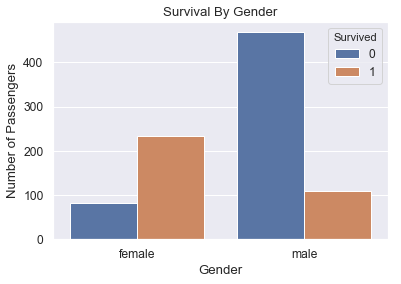

In [16]:
sns.barplot(x = 'Sex',y = 'PassengerId', hue = 'Survived', data = gender_diff)
plt.title('Survival By Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()

As shown by the above bar graph, males were far more likely to perish on the titanic than females. Females were, in turn, more likely to survive than males.

In [17]:
class_diff = titanic.groupby(['Pclass','Survived'], as_index=False)['PassengerId'].count()

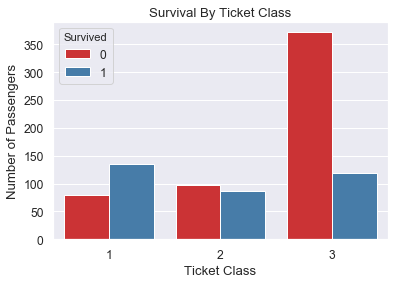

In [18]:
sns.barplot(x = 'Pclass',y = 'PassengerId', palette='Set1', hue = 'Survived', data = class_diff)
plt.title('Survival By Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Number of Passengers')
plt.show()

As shown by the above bar graph, those who had 3rd class tickets were far more likely to perish than those who had 1st or 2nd class tickets.

In [19]:
loc_diff = titanic.groupby(['Embarked','Survived'], as_index=False)['PassengerId'].count()

It is necessary to drop rows where the port of embarkation is unknown.

In [20]:
loc_diff = loc_diff.dropna(subset=['Embarked'])

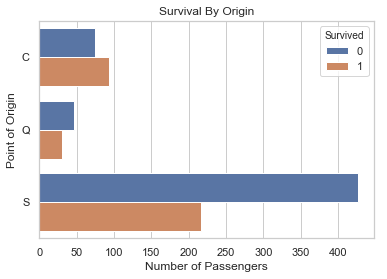

In [21]:
sns.set(style = 'whitegrid')
sns.barplot(x = 'PassengerId', y = 'Embarked', hue = 'Survived', data = loc_diff)
plt.title('Survival By Origin')
plt.xlabel('Number of Passengers')
plt.ylabel('Point of Origin')
plt.show()

While more people from Southampton perished, there were also more people from Southampton who survived, suggesting there were simply more people from the region than from elsewhere.

In [22]:
age_fare_diff = titanic.dropna(subset=['Age'])

Because some of the age cells are missing values, they are dropped for the sake of accuracy.

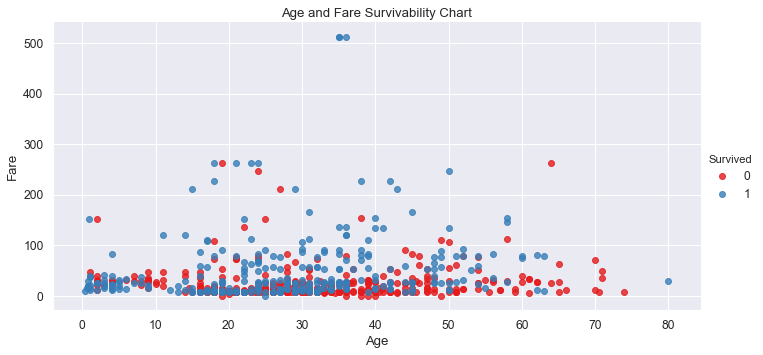

In [23]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("darkgrid")

sns.lmplot('Age', 'Fare',
           data=age_fare_diff,
           fit_reg=False,
           aspect=2,
           palette='Set1',
           hue="Survived")
plt.title('Age and Fare Survivability Chart')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

The closer clustered blue markers near the bottom left of the graph shows that younger passengers were more likely to survive than older ones, and the fact that, as you progress upwards, the number of red markers is far lower than it is towards the bottom of the graph suggests that those who paid more for their ticket were also more likely to survive.

In conclusion, if you were male, had a 3rd class ticket, or embarked from Southampton, you more likely than not died on the Titanic. Furthermore, based on the scatterplot, younger passengers as well as those who paid the most were more likely to survive. These are probably due to the fact that women and children most likely disembarked from the ship first, starting with those in first class cabins.